**Искусственный интеллект**  — область компьютерных наук, связанная с моделированием интеллектуальных или творческих видов человеческой деятельности.

**Машинное обучение** — подраздел ИИ, связанный с разработкой алгоритмов и статистических моделей, которые компьютерные системы используют для выполнения задач без явных инструкций. 

**Искусственная нейронная сеть** — разновидность алгоритмов машинного обучения, математическая модель, построенная по принципу организации и функционирования биологических нейронных сетей. ИНС состоит из слоев «нейронов», которые связаны между собой. В простом случае это входной слой и выходной слой.  

**Глубокое обучение** — обучение «глубоких» ИНС. Помимо входного и выходного слоя, они состоят из сотен дополнительных «скрытых» слоев между видимыми слоями для ввода и вывода.

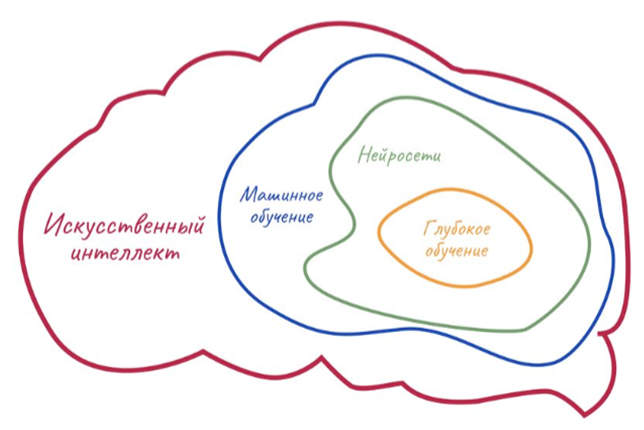

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn

### Что такое нейронная сеть

$X$ — входные данные, матрица, где $n$ — количество объектов, $m$ — количество признаков.

\begin{equation*}
X = \left(
\begin{array}{cccc}
x_{11} & x_{12} & \ldots & x_{1m}\\
x_{21} & x_{22} & \ldots & x_{2m}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \ldots & x_{nm}
\end{array}
\right)
\end{equation*}

$Y$ — правильных ответов, их значения известны, вектор длины $n$;

\begin{equation*}
Y = \left(
\begin{array}{cccc}
y_{1}\\
y_{2}\\
\vdots\\
y_{n} \end{array}
\right)
=  \left(
\begin{array}{cccc}
f(x_{1*})\\
f(x_{2*})\\
\vdots\\
f(x_{n*}) \end{array}
\right)
\end{equation*}

$f$ — целевая зависимость, функция, которая каждому объекту сопоставляет ответ. Можно сравнить с работой человеческого мозга. 

При взгляде на фотографию мы точно можем определить, изображена на ней кошка или собака, но не можем с точностью утверждать, на основе каких признаков наш мозг делает этот вывод. 

Наша цель — найти такую функцию $\hat{f}$, которая лучшим образом аппроксимирует целевую функцию $f$, то есть способна максимально точно предсказать ответы $\hat{Y}$ для объектов $X$.

Множество входных данных $X$ делится на обучающую $X'$ и тестовую $X''$ выборки. 

Искомая функция $\hat{f}$ должна одинаково хорошо предсказывать ответы для объектов обучающей выборки $\hat{f}(X') \sim f(X')$ и тестовой выборки $\hat{f}(X'') \sim f(X'').$


Как может быть устроена функция $\hat{f}(x)$? 

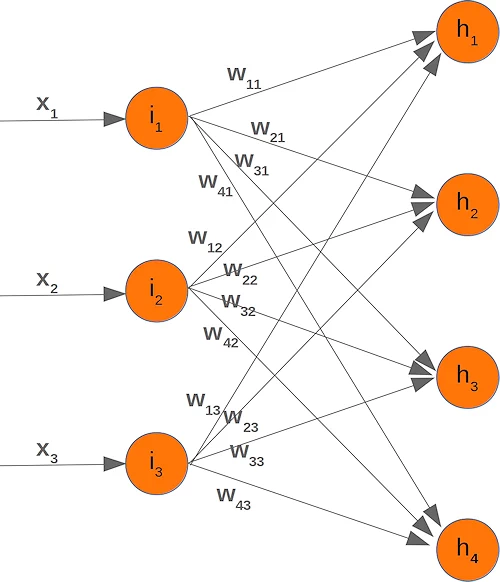

$\overline{x}=x_1, x_2, x_3$ — вектор признаков объекта $x$;

$i_1, i_2, i_3$ — входной слой нейронной сети $x$;

$h_1, h_2,h_3, h_4$ — скрытый слой нейронной сети.

Признаки могут по-разному влиять на отнесение объекта к его классу. Для каждого признака необходимо определить его вес.

$w_{KM}$ — вес, где $K$ — номер нейрона скрытого слоя, $M$ — номер нейрона входного слоя;

$b$ — свободный коэффициент или сдвиг.

Вход в первый нейрон скрытого слоя — взвешенная сумма признаков: $h_1 = w_{11}\cdot x_{1}+w_{12}\cdot x_{2}+w_{13}\cdot x_{3}+b_1$

Сумму можно описать как скалярное произведение вектора признаков $x=(x_{1},x_{2},x_{3})$ на вектор весов $w=(w_{11},w_{12},w_{13})$:

$$h_1 = \left \langle w,x \right \rangle + b_1$$

📌 Сколько весов на первом скрытом слое?

В данном примере скрытый слой всего один, но их может быть и больше.

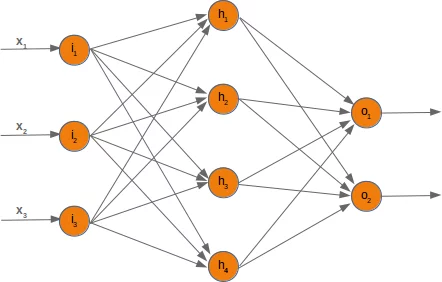

Результат, полученный на скрытом слое, передается на следующий скрытый слой или на выходной слой ($o_1, o_2$).

### Функция активации

Минимальным функциональным элементом нейронной сети является одиночный нейрон. В нейроне осуществляется две операции:
1. Вычисляется взвешенная и смещенная сумма его входов
$$ h=\sum_{i=1}^n w_i \cdot x_i+b=WX+b,$$
где $W$ обозначает вектор весов, $X$ обозначает вектор признаков, а $b$ задаёт величину смещения.
1. К получившейся величине применяется некоторая нелинейная функция, называемая функцией активации
$$ y = f(s)$$


Взвешенная и смещенная сумма входов $h$ может принимать произвольное значение. Данное значение  передается в функцию активации, которая, как правило, обладает другим множеством возможных значений.

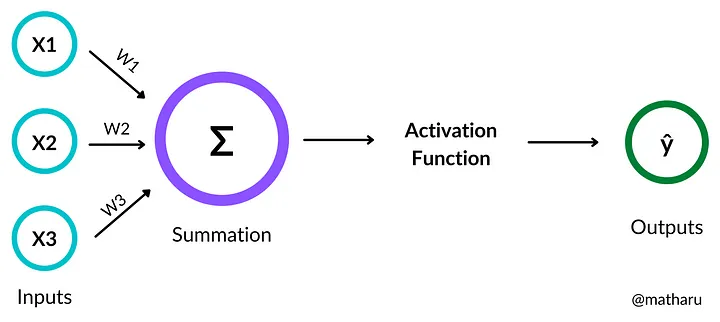

Биологическая параллель: есть некоторый входной сигнал, и нейрон в зависимости от сигнала как-то преобразует его или отдает в исходном виде. Аналогично с числами: нейрон может как-то преобразовать число или передать его в текущем виде.

Перед тем как перейти к функциям активации, вспомним, что представляет собой экспоненциальная функция (экспонента) $\exp(x) = e^x$, где $e\approx2,718$ — число Эйлера.

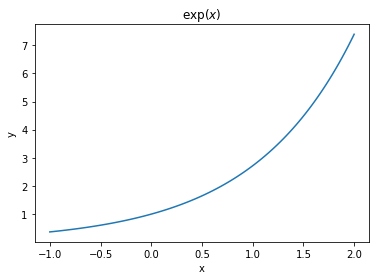

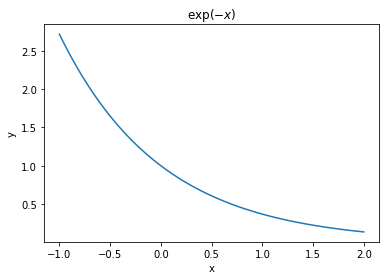

In [2]:
x = np.linspace(-1, 2, 100)

y1 = np.exp(x)
plt.figure()
plt.title("$\exp(x)$")
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y2 = np.exp(-x)
plt.figure()
plt.plot(x, y2)
plt.title("$\exp(-x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Рассмотрим, какие бывают функции активации (другое название — нелинейности).

#### Сигмоида

**Сигмоида**:
$\large\sigma(x) = \frac{1}{1+e^{-x}}.$

```python
torch.nn.Sigmoid()
```

📌 Что является областью определения и областью значений функции?

- В модуле `nn` лежат функции активации, мы берем оттуда функцию `Sigmoid`. 
- Создаем некоторые входные данные — вектор `input` длины $100000$ из нормального распределения (среднее $0$, дисперсия $1$);
- Применяем функцию активации;
- Получаем выходные данные — вектор `input` длины $100000$, содержащий числа от $0$ до $1$.

In [3]:
act = nn.Sigmoid()
input = torch.randn(100000)
print(f'Входные данные: {input}')
output = act(input)
print(f'Выходные данные: {output}')

Входные данные: tensor([ 1.3075, -0.6092, -2.2933,  ..., -0.6594,  0.5429,  1.2985])
Выходные данные: tensor([0.7871, 0.3522, 0.0917,  ..., 0.3409, 0.6325, 0.7856])


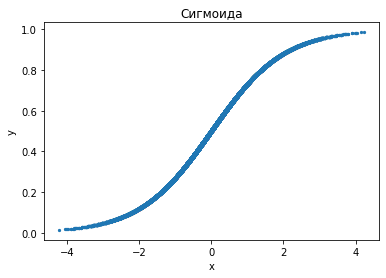

In [4]:
plt.scatter(input, output, s=5);
plt.title("Сигмоида")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Используется в задачах бинарной классификации. Поскольку функция выдает значения в диапазоне от 0 до 1, её результат можно интерпретировать как вероятность принадлежности к положительному классу.

#### ReLU

**ReLU (Rectified Linear Unit):**
$ReLU(x) =
\begin{cases}
x, \text{ если }\text{$x>0$} \\
0 \text{ в остальных случаях}
\end{cases}
$
```python
torch.nn.ReLU()
```

📌 Как будет выглядеть график функции?

📌 Зададим функцию активации — ReLU;

📌 Создадим входные данные — вектор `input` длины $100000$ из нормального распределения;

📌 Применим функцию активации;

📌 Получим выходные данные — вектор `output` длины  $100000$.

In [5]:
# Место для вашего кода
act = nn.ReLU()
input = torch.randn(100000)
print(f'Входные данные: {input}')
output = act(input)
print(f'Выходные данные: {output}')

Входные данные: tensor([ 0.5015, -0.3915,  1.2276,  ..., -0.8928,  1.6834,  0.2523])
Выходные данные: tensor([0.5015, 0.0000, 1.2276,  ..., 0.0000, 1.6834, 0.2523])


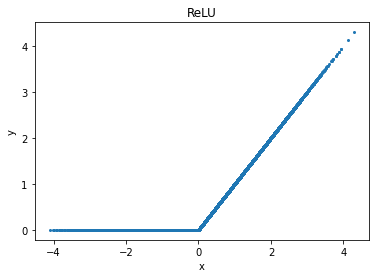

In [6]:
plt.scatter(input, output, s=4);
plt.title("ReLU")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Если нейрон получает значение меньше 0, то мы «отключаем его», отдаем 0. Если входное значение больше 0, то сигнал «прошел», мы отдаем ненулевое значение. Чем больше сигнал, тем больше результат применения функции активации.

#### Softmax

Если сигмоида позволяет нам интерпретировать выход сети как вероятность для бинарной классификации, то в случае с многоклассовой классификацией используется функция активации **softmax**: 
$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)}$$


- Зададим функцию активации — softmax;
- Создадим входные данные — вектор `input` длины $5$ из нормального распределения.

📌 Посчитаем сумму входных значений `sum(input)`;
- Применим функцию активации;
- Получим выходные данные — вектор `output` длины  $5$;

📌 Посчитаем сумму выходных значений `sum(output)`.

In [9]:
act = nn.Softmax()
input = torch.randn(5)
print(f'Входные данные: {input}')
print(f'Сумма входных значений: {sum(input)}') # Место для вашего кода
output = act(input)
print(f'Выходные данные: {output}')
print(f'Сумма выходных значений: {sum(output)}') # Место для вашего кода

Входные данные: tensor([ 0.5243, -1.2431, -0.7776, -0.8044,  1.2534])
Сумма входных значений: -1.04749596118927
Выходные данные: tensor([0.2645, 0.0452, 0.0719, 0.0700, 0.5483])
Сумма выходных значений: 1.0


<ipython-input-9-8af5ce881cb4>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = act(input)


Функция softmax выдает распределение вероятностей для всех классов, сохраняя исходное соотношение значений.

#### Пример в pytorch

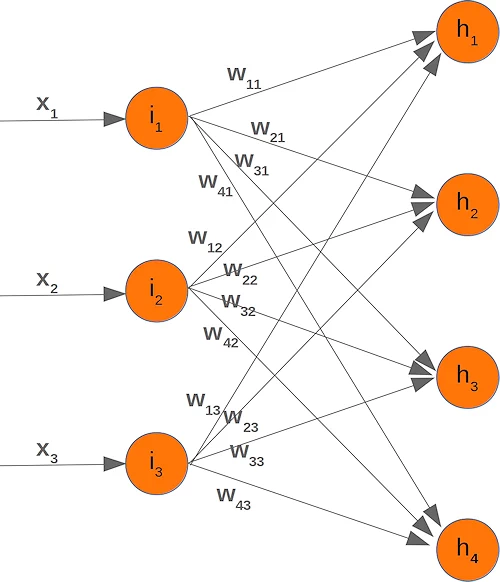

Создадим линейный полносвязный слой. На вход он получает вектор длины $3$, на слое $4$ нейрона.
- Линейный слой осуществляет линейное преобразование над входящими данными. 
- Полносвязным называется слой, в котором каждый нейрон соединен со всеми нейронами на предыдущем уровне, каждая связь имеет свой весовой коэффициент. 

Вход в первый нейрон — взвешенная сумма признаков: $h_1 = w_{11}\cdot x_{1}+w_{12}\cdot x_{2}+w_{13}\cdot x_{3}+b_1 = \left \langle w,x \right \rangle + b_1$.

In [10]:
layer = nn.Linear(3,4)

Веса и сдвиг автоматически активируются случайным образом.

In [11]:
layer.weight

Parameter containing:
tensor([[-0.4840, -0.0380,  0.3118],
        [ 0.2534,  0.5242, -0.1870],
        [ 0.5475, -0.2629, -0.4774],
        [-0.2106,  0.4454, -0.1861]], requires_grad=True)

In [12]:
layer.bias

Parameter containing:
tensor([-0.2048, -0.2886, -0.5603,  0.0473], requires_grad=True)

Создадим функцию активации (сигмоиду) и зададим случайные входные значения.

In [13]:
act = nn.Sigmoid()
input = torch.randn(3)

Слой применим к входному вектру, активацию — к общему результату.

In [14]:
print(f'Входной вектор: {input}')
print(f'Выход слоя: {layer(input)}')
print(f'Функция активации: {act(layer(input))}')

Входной вектор: tensor([0.5764, 1.3338, 0.6530])
Выход слоя: tensor([-0.3308,  0.4345, -0.9072,  0.3985], grad_fn=<AddBackward0>)
Функция активации: tensor([0.4180, 0.6070, 0.2876, 0.5983], grad_fn=<SigmoidBackward0>)


У нас есть нейронная сеть с некоторыми параметрами: весами $w_1,\cdots,w_m$ и сдвигом $b$. Прежде всего мы должны понять, насколько она точна, то есть насколько наши ожидания соответствуют результату работы нейронной сети. 

Мы подали на вход нейронной сети данные, сигналы прошли через наши слои и функции активации, и на выходе мы имеем некоторый ответ. Как его оценить? Насколько он точен?

### Функция потерь

Для оценки соответствия полученного результата ожидаемому используют **функцию потерь**:  $\mathcal{L}(y, \hat{y})$. Она показывает стоимость ошибки, сравнивая $\hat{y}$ — ответы, предсказанные нейросетью, и $y$ — правильные ответы на конкретном объекте $x$

📌 Рассмотрим задачу бинарной классификации (классы $1$ и $0$). На выходе мы хотим получать вероятность класса (от $0$ до $1$). Пусть мы знаем вероятность класса $1$ для объекта $x$. Как найти для него вероятность класса $0$?

Примеры функции потерь:
* Кросс-энтропия (для бинарной классификации):
$$ \mathcal{L}(y,\hat{y}) = -(y\cdot\log \hat{y} + (1-y)\cdot\log(1-\hat{y}));$$
* Квадратичное отклонение (для задач регрессии):
$$\mathcal{L}(y,\hat{y}) = (y - \hat{y})^2.$$

Чтобы оценить, насколько хорошо нейронная сеть предсказывает ответы для всего множества объектов $X$, нужно усреднить значение функции потерь:
$$\mathcal{L} = \frac{1}{n}\sum_{i = 1}^{n} \mathcal{L}(y_i, \hat{y_i})$$

📌 Напишите функцию кросс-энтропии, учитывая, что для подсчета среднего используется метод `np.mean`, а для подсчета логарифма — `np.log`. В каком случае значение функции потерь будет меньше?

In [15]:
def loss(y, y_hat):
    return -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat)) # Место для вашего кода

In [16]:
y = np.array([0.0, 1.0, 0.0])
y1_hat = np.array([0.1, 0.56, 0.34])
y2_hat = np.array([0.48, 0.32, 0.15])
L1 = loss(y, y1_hat)
L2 = loss(y, y2_hat)
print(f'y = {y}')
print(f'y_hat1 = {y1_hat}')
print(f'y_hat2 = {y2_hat}')
print(f'L1 = {L1}')
print(f'L2 = {L2}')

y = [0. 1. 0.]
y_hat1 = [0.1  0.56 0.34]
y_hat2 = [0.48 0.32 0.15]
L1 = 0.36689815162414474
L2 = 0.6519598933642679


### Метод градиентного спуска

#### Точки минимума и точки максимума функции


📌 Как найти точку минимума и точку максимума функции?

- Найти производную функции.
- Найти значения, при которых производная равна нулю.
- Определить знаки производной. Когда функция возрастает, то производная положительна. Когда функция убывает, то производная отрицательна.
- Определить точки минимума и максимума. Если функция возрастала и в определенной точке начала убывать, то это точка максимума. Если функция убывала и в некоторой точке начала возрастать, то это точка минимума.

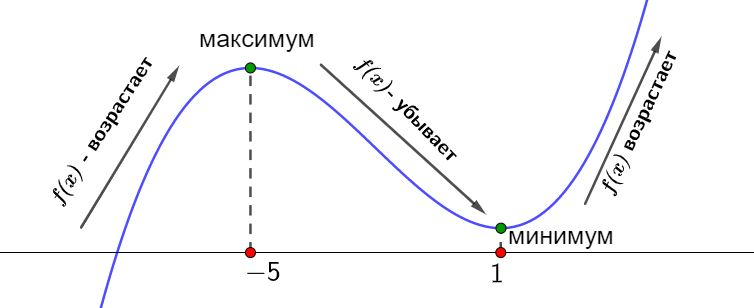

Таблица производных:

$c'=0, c=const$

$(x^n)'=nx^{n-1}$

Рассмотрим на примере функции $f(x)=x^2$. 

Она зависит от одной переменной $x$. 

Найдем производную $f'(x^2)$.
- $f'(x^2) = 2x$;
- $f'(x^2) = 0$ при $x = 0$;
-  $f'(x^2) < 0 $ при $x < 0$, $f'(x^2) > 0 $ при $x > 0$;
- $f(x)$ убывает при $x < 0$, $f(x)$ возрастает при $x > 0$;
- $x = 0$ — точка минимума. 

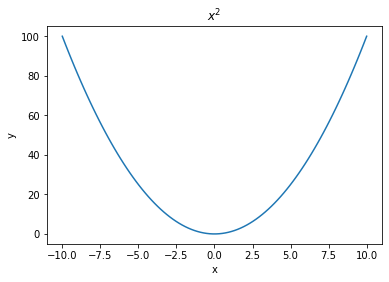

In [17]:
x = np.linspace(-10, 10, 100)
y = x**2
plt.figure()
plt.title("$x^2$")
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Частная производная и градиент функции

Если функция зависит от нескольких переменных, можно говорить о частной производной, когда все остальные переменные, кроме интересующей нас, становятся константами. Производная функции $f$ от переменной $x$: $\large\frac{\partial f}{\partial x}$.


Рассмотрим функцию $f(x,z)=x^2+xz^2$. Если рассчитывать производную от $x$, то $z$ становится константой. 

Найдем частную производную от переменной $x$ функции $f$.

$$\frac{\partial f}{\partial x}= 2x + z^2$$

**Градиент** в математическом анализе — это вектор, указывающий на направление максимального роста функции в заданной точке. Вектор-градиент состоит из частных производных функции от каждой из ее переменных $(x_{1},...,x_{m})$:

$$ \nabla f(x_{1},...,x_{m}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{m}_{i=1}$$

Рассмотрим функцию $f(x,y,z)=2xy^3+3z^2$. Найдем градиент функции для переменных $x,y,z$.

$$\frac{\partial f}{\partial x}= 2y^3$$

$$\frac{\partial f}{\partial y}= 6xy^2$$

$$\frac{\partial f}{\partial z}= 6z$$

$$ \nabla f(x,y,z) = \left(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y},\frac{\partial f}{\partial z}\right)=\left(2y^3,6xy^2,6z\right)$$

Для минимизации ошибки нужен антиградиент, который показывает направление скорейшего убывания функции.

#### Градиентный спуск и скорость обучения

**Градиентный спуск** — это некоторый алгоритм, который помогает нам итеративно шагами перемещаться по функции и в конце концов оказаться в ее минимуме. Мы не напрямую ищем точку, где производная равна нулю, а некоторыми манипуляциями передвигаемся вниз по функции. Градиентный спуск выбирает случайную точку, находит направление самого быстрого убывания функции и двигается до ближайшего минимума вдоль этого направления. 

Важно настроить размер шага или **скорость обучения** $η$. Для каждого случая этот параметр подбирается отдельно, может принимать значения в диапазоне от $0$ до $1$.

При $η=0.1$ мы постепенно приходим в минимум функции.

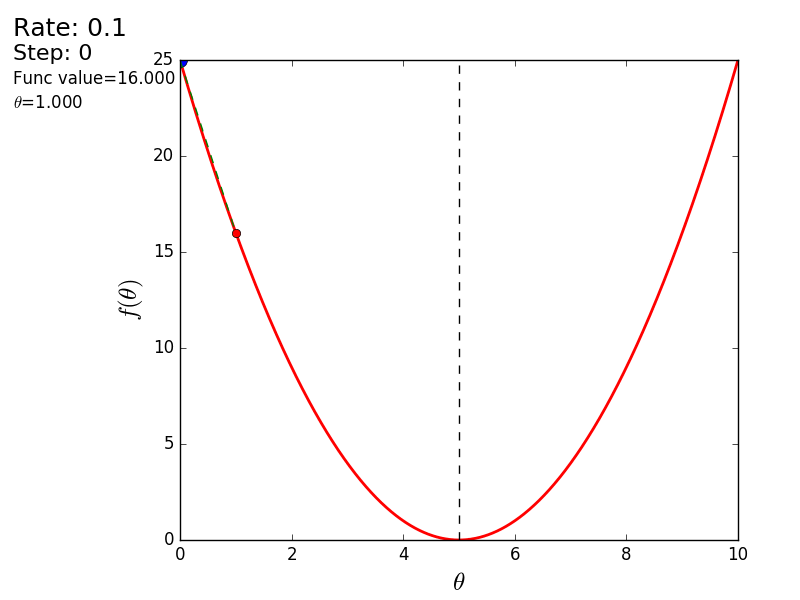

При $η=0.9$ мы проскакиваем минимум и наоборот поднимаемся выше

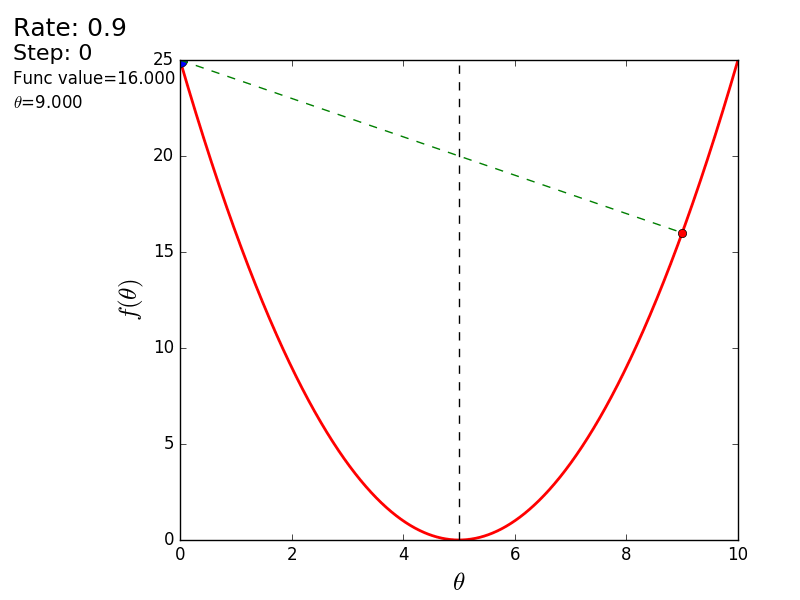

Если на каком-то этапе разность между старой точкой (до шага) и новой снижается ниже предела, считается, что минимум найден, алгоритм завершен.

#### Минимизация функции потерь и обновление весов

Вспомним, что функция потерь $\mathcal{L}(y, \hat{y})$ зависит от нескольких переменных: весов $\overline{w} = (w_1, \cdots, w_m)$ и сдвига $b$.

Следовательно, мы будем использовать несколько частных производных:

- частные производные функции потерь от весов $w_1,\cdots,w_m$: $\large\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w_1}, \cdots, \frac{\partial \mathcal{L}(y, \hat{y})}{\partial w_m}$
- частная производная функции потерь от сдвига $b$: $\large\frac{\partial \mathcal{L}(y, \hat{y})}{\partial b}$

После подсчета частных производных нам необходимо обновить значения весов и сдвига.

$$w_i = w_i-η\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w_i}$$

$$b = b-η\frac{\partial \mathcal{L}(y, \hat{y})}{\partial b}$$

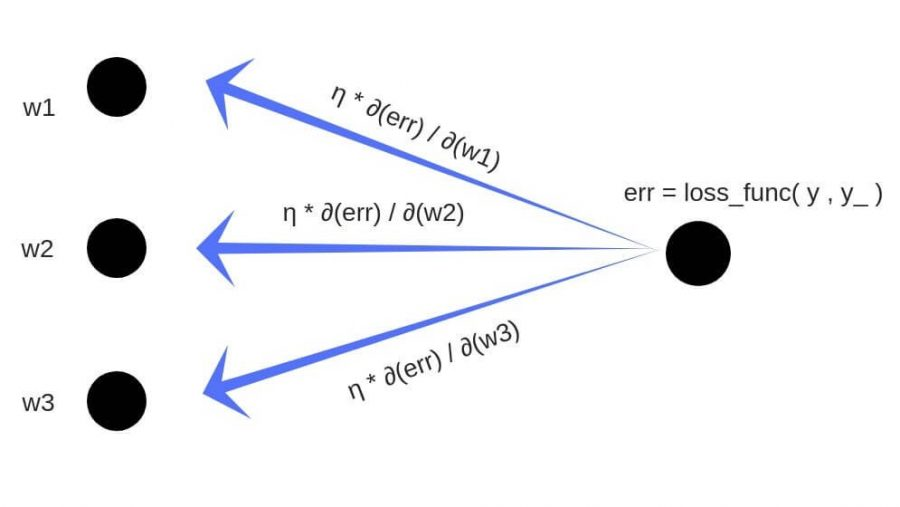

Обновление весов и сдвига происходит итерационно. Процесс поиска подходящих значений состоит из нескольких дискретных шагов, каждый из которых должен минимизировать функцию потерь.

При проходе по сети вперед и предсказании ответов мы осуществляем **прямое распространение (forward propagation)**. При проходе по сети назад и обновлении весов мы осуществляем **обратное распространение ошибки (backpropagation)**.

При обучении нейросети мы также задаем **количество эпох** – это количество проходов через обучающий набор данных. Важно, что при подсчете и обновлении весов мы используем не все данные, а разбиваем их на **батчи**. Размер батча определяет количество объектов, которые необходимо обработать перед обновлением параметров модели.

Процесс обучения выполняется циклом длиной в количество эпох:


*  Прямое распространение: пропускаем входные данные через нейроны сети.
*  Cчитаем значение функции потерь.
*  Ищем градиент – направление максимального роста функции потерь при нынешних параметрах. 
*  Обратное распространение: обновляем веса, перемещаясь по функции потерь в обратном градиенту направлении.



📌 В чем состоит обучение? Что значит «подобрать веса»? На что уходит большое количество времени и ресурсов?